# Package loading

In [1]:
import numpy as np
import pandas as pd
import os
import shapely
import dxfgrabber as dxfgb
import matplotlib.pyplot as plt

# Package documentation

http://dxfgrabber.readthedocs.io/en/latest/  
https://shapely.readthedocs.io/en/latest/

# DXF laoding

In [25]:
#List of all the dixs in the folder
dxffolder = os.path.join('/', *os.getcwd().split('/')[:-1], 'Sample', 'DXF')
dxflist = [os.path.join(dxffolder, file) for file in os.listdir(dxffolder) if file.endswith('.dxf')]

In [26]:
dxf = dxfgb.readfile(dxflist[0])
print("DXF version: {}".format(dxf.dxfversion))


DXF version: AC1015


In [27]:
header_var_count = len(dxf.header) # dict of dxf header vars
header_var_count

36

In [28]:
layer_count = len(dxf.layers) # collection of layer definitions
layer_count

14

In [29]:
block_definition_count = len(dxf.blocks) #  dict like collection of block definitions
block_definition_count

2

In [30]:
entity_count = len(dxf.entities) # list like collection of entities
entity_count

51

In [50]:
for x in [element for element in dxf.modelspace() if element.dxftype == 'LINE']:
    print(x.start)
    print(x.end)

(-70.8400038184, 260.2706522021)
(-70.8400038184, 218.2726954516)
(-70.8400038184, 215.6598941546)
(-70.8400038184, 113.9863894605)
(-70.8400038184, 112.4540700242)
(-70.8400038184, 90.9709633923)
(-70.8400038184, 30.6246053991)
(-70.8400038184, 89.4397514193)
(-70.8400038184, 89.4397514193)
(-70.8400038184, 90.9709633923)
(-70.8400038184, 112.4540700242)
(-70.8400038184, 113.9863894605)
(-70.8400038184, 215.6598941546)
(-70.8400038184, 218.2726954516)
(435.3355912161, 29.6246053991)
(-69.8400038184, 29.6246053991)
(388.1599961816, 54.0219971716)
(384.1599961816, 54.0219971716)
(170.6599961816, 54.0219971716)
(166.6599961816, 54.0219971716)
(-46.8400038184, 54.0219971716)
(-50.8400038184, 54.0219971716)
(-50.8400038184, 65.0219971716)
(-46.8400038184, 65.0219971716)
(166.6599961816, 65.0219971716)
(170.6599961816, 65.0219971716)
(384.1599961816, 65.0219971716)
(388.1599961816, 65.0219971716)
(425.2032893607, 112.6492618809)
(423.4023165867, 113.0053845694)
(369.8398596787, 216.35825977

# DXF reading module

In [ ]:
class dxfparser():
    def __init__(self, bend_color=0, text_color=1, ):
        self.bend_color = bend_color
        self.text_color = text_color
    
    def load_dxf(self):
        pass
    
    def count_details(self):
        pass
    
    def surface(self):
        pass
    #Bound, area, convex_hull and minimum_rotated_rectangle methods
    
    def bend_placement(self):
        pass
    
    def pattern_count(self):
        pass
    
    def parse(self, dxflist):
        pass

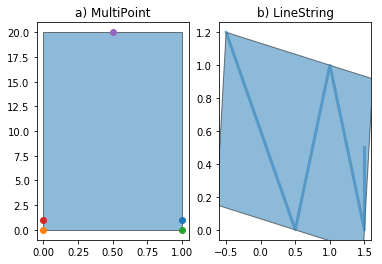

In [13]:
from shapely.geometry import MultiPoint, Polygon, LineString
import matplotlib.pyplot as plt
from descartes.patch import PolygonPatch

#from figures import DARKGRAY, GRAY, BLUE, SIZE, set_limits

fig = plt.figure(1)
fig.set_frameon(True)

# 1
ax = fig.add_subplot(121)

mp = MultiPoint([(1, 1), (0, 0), (1, 0), (0, 1), (0.5, 20)])
rect = mp.minimum_rotated_rectangle

for p in mp:
    ax.plot(p.x, p.y, 'o')
patch = PolygonPatch(rect, alpha=0.5, zorder=2)
ax.add_patch(patch)
ax.set_title('a) MultiPoint')

#set_limits(ax, -1, 2, -1, 2)

# 2
ax = fig.add_subplot(122)
ls = LineString([(-0.5, 1.2), (0.5, 0), (1, 1), (1.5, 0), (1.5, 0.5)])
rect = ls.minimum_rotated_rectangle

ax.plot(*ls.xy, linewidth=3, alpha=0.5, zorder=2)
patch = PolygonPatch(rect,  alpha=0.5, zorder=2)
ax.add_patch(patch)

#set_limits(ax, -1, 2, -1, 2)

ax.set_title('b) LineString')

plt.show()


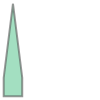

In [20]:
MultiPoint([(1, 1), (0, 0), (1, 0), (0, 1), (0.5, 5)]).convex_hull

In [26]:
MultiPoint([(0, 0), (1, 1), (1, -1)]).minimum_rotated_rectangle.bounds

(0.0, -0.9999999999999998, 1.9999999999999996, 0.9999999999999998)